#  EMF RBM Energy Densities  Long run

Look at different ways of computing the

- energy density
- free energy density
- entropy density

We can

- use the TAP S and MF Energy *U_naive   
    - which takes an equlibration step first  
    - S(mv, mh), U_naive(mv, mh)
- use a simple h = means_hiddens() step
    - S(v, h), E_MF(v, h)


In [1]:
import numpy as np
import h5py

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import linear_model, datasets, metrics, preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

import psutil

In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.utils.validation import assert_all_finite
from scipy.sparse import csc_matrix, csr_matrix, lil_matrix
from sklearn.preprocessing import Binarizer
np.seterr(all='warn')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

## MNIST data

http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html



In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

In [4]:
Xall, y = mnist.data / 255., mnist.target
X_train, X_test = Xall[:60000], Xall[60000:]
y_train, y_test = y[:60000], y[60000:]

In [5]:
from sklearn.preprocessing import binarize
X = binarize(X_train, threshold=0.1, copy=True)

### Helper methods for simple case

In [6]:
from sklearn.utils.fixes import expit    
from sklearn.utils.extmath import safe_sparse_dot

def sig_means(x, b, W):
    a = safe_sparse_dot(x, W.T) + b
    return expit(a, out=a)

### Baseline

In [7]:
import emf_rbm

In [8]:
psutil.swap_memory()

sswap(total=0, used=0, free=0, percent=0.0, sin=0, sout=0)

### mean Entropy, Energy, and Free Energy

In [ ]:
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True, n_iter=500)
rbm= rbm.fit(X)

[EMF_RBM] Iteration 1, pseudo-likelihood = -234.89, time = 25.42s
computing TAP Free Energies
monitor:  -361.351919679 333.63360437 -27.0747410857
[EMF_RBM] Iteration 2, pseudo-likelihood = -202.00, time = 58.09s
computing TAP Free Energies
monitor:  -348.491569775 280.976056706 -66.142838803
[EMF_RBM] Iteration 3, pseudo-likelihood = -162.68, time = 58.07s
computing TAP Free Energies
monitor:  -339.800065392 252.684885317 -84.8376244858
[EMF_RBM] Iteration 4, pseudo-likelihood = -144.45, time = 58.20s
computing TAP Free Energies
monitor:  -349.045776069 232.857566125 -113.190081158
[EMF_RBM] Iteration 5, pseudo-likelihood = -131.48, time = 58.28s
computing TAP Free Energies
monitor:  -359.614943443 218.365962956 -137.577973637
[EMF_RBM] Iteration 6, pseudo-likelihood = -121.53, time = 58.16s
computing TAP Free Energies
monitor:  -370.305042473 206.932460092 -159.087175463
[EMF_RBM] Iteration 7, pseudo-likelihood = -115.95, time = 58.11s
computing TAP Free Energies
monitor:  -379.12723

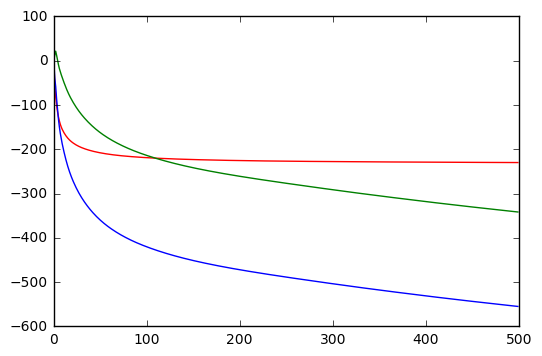

In [11]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green')